In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../..')

from utils.workflow import WorkflowModel
import utils.plotting as plotting
from utils.eval import eval_predictions

2025-12-14 19:43:51.799396: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default float type to float64


In [2]:
df = pd.read_csv("../../data/influenza_england_1978_school.csv")

In [3]:
I_data = df["in_bed"].to_numpy()

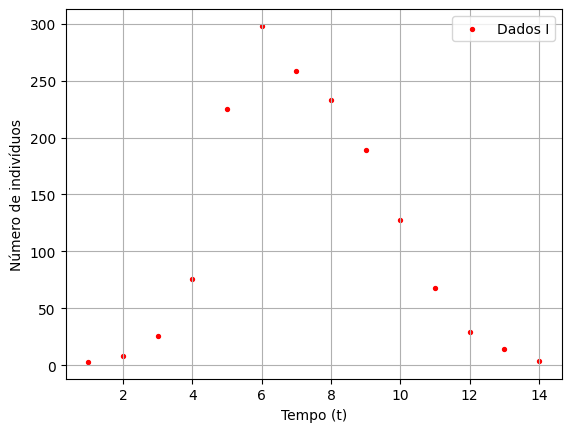

In [4]:
plotting.plot_incidence_data(I_data, "dados-english-boardschool.png")

In [5]:
t_0, t_f = 0, len(I_data) - 1
N = 763
gamma = 0.457
data_t = np.linspace(t_0, t_f, len(I_data))

In [6]:
model = WorkflowModel(t_0, t_f, I_data, data_t, N, gamma, scaling="norm")
model.S0, model.I0, model.R0

[<deepxde.icbc.initial_conditions.IC object at 0x7f80de0de110>, <deepxde.icbc.initial_conditions.IC object at 0x7f80de0dcb50>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x7f80d4ef2d10>]
Compiling model...
'compile' took 0.010082 s



2025-12-14 19:43:56.029403: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1765752236.030176  860432 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2590 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


(np.float64(0.9960681520314548), np.float64(0.003931847968545216), 0.0)

In [7]:
model.train()

Training model...



2025-12-14 19:43:58.136508: I external/local_xla/xla/service/service.cc:163] XLA service 0x5616b4d86120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-14 19:43:58.136533: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-12-14 19:43:58.144499: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-14 19:43:58.202913: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1765752238.469167  860432 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                            Test loss                                             Test metric
0         [5.67e-02, 1.32e-02, 9.92e-01, 1.55e-05, 1.09e-01]    [5.04e-02, 1.00e-02, 9.92e-01, 1.55e-05, 1.09e-01]    []  
100       [7.39e-04, 8.34e-04, 5.41e-06, 8.18e-08, 3.97e-03]    [7.49e-04, 8.67e-04, 5.41e-06, 8.18e-08, 3.97e-03]    []  
200       [6.32e-04, 7.74e-04, 1.91e-08, 4.43e-06, 2.13e-03]    [6.37e-04, 7.86e-04, 1.91e-08, 4.43e-06, 2.13e-03]    []  
300       [3.58e-04, 6.87e-04, 5.20e-08, 3.60e-06, 1.86e-03]    [3.54e-04, 6.71e-04, 5.20e-08, 3.60e-06, 1.86e-03]    []  
400       [2.07e-04, 6.44e-04, 9.26e-08, 3.10e-06, 1.64e-03]    [2.01e-04, 6.41e-04, 9.26e-08, 3.10e-06, 1.64e-03]    []  
500       [1.26e-04, 5.98e-04, 1.27e-07, 2.69e-06, 1.43e-03]    [1.21e-04, 6.07e-04, 1.27e-07, 2.69e-06, 1.43e-03]    []  
600       [8.70e-05, 5.34e-04, 1.43e-07, 2.23e-06, 1.23e-03]    [7.89e-05, 5.50e-04, 1.43e-07, 2.23e-06, 1.23e-03]    []  
700      

(<deepxde.model.LossHistory at 0x7f80d4d56f50>,
 <deepxde.model.TrainState at 0x7f80d4d56650>)

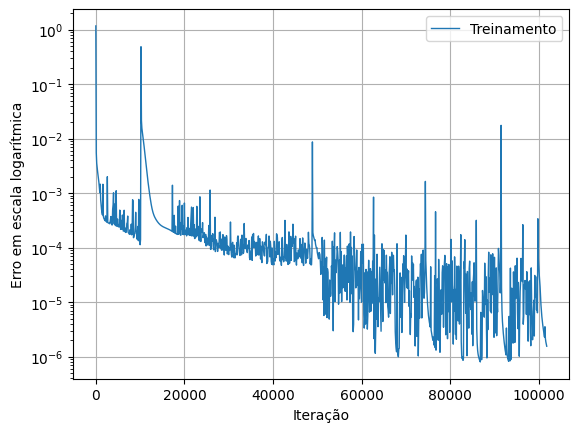

In [8]:
plotting.plot_losshistory(model.losshistory, "loss-english-boardschool")

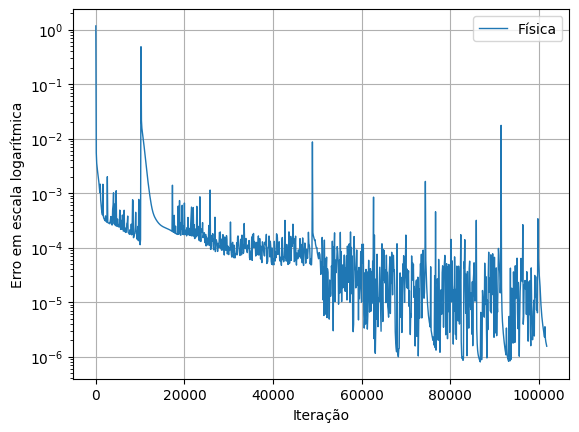

In [ ]:
plotting.plot_phys_losshistory(model.losshistory, "loss-phys-english-boarding-school")

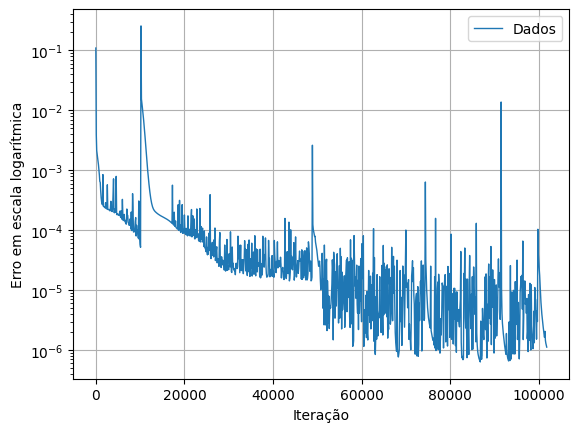

In [ ]:
plotting.plot_data_losshistory(model.losshistory, "loss-data-english-boarding-school")

In [11]:
test_t = np.linspace(t_0, t_f, 50)
pred = model.predict(test_t)

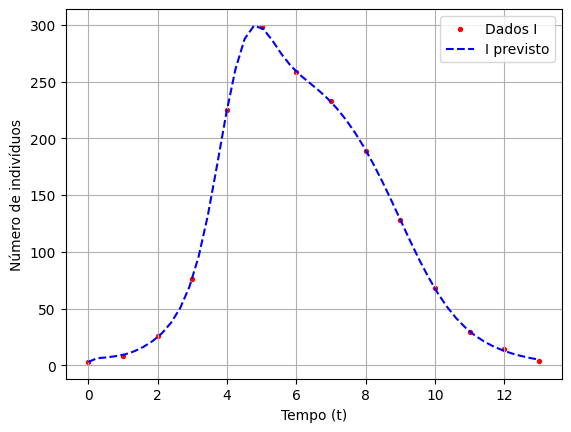

In [ ]:
plotting.plot_incidence_results(I_data, data_t, pred[:,1], test_t, "incidence-result-english-boarding-school")

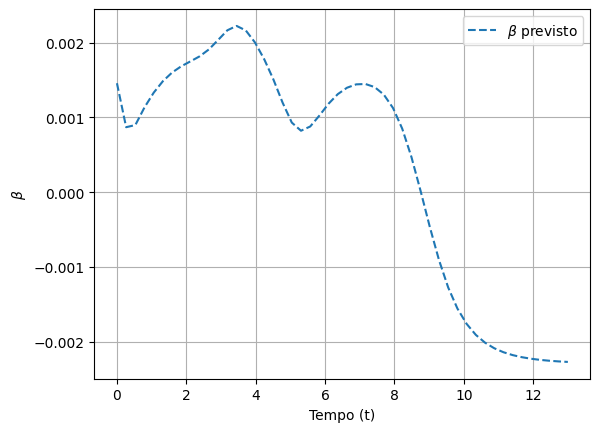

In [ ]:
dfe_t = 7
min_raissi = 0.002
max_raissi = 0.0025
plotting.plot_beta(model.scale(pred[:,2]), test_t,
    vlines=[(dfe_t, "DFE", "red")], 
    hlines=[(min_raissi, "min Raissi(2019)", "green"), (max_raissi, "max Raissi(2019)", "green")],
    figname="beta-english-boarding-school")

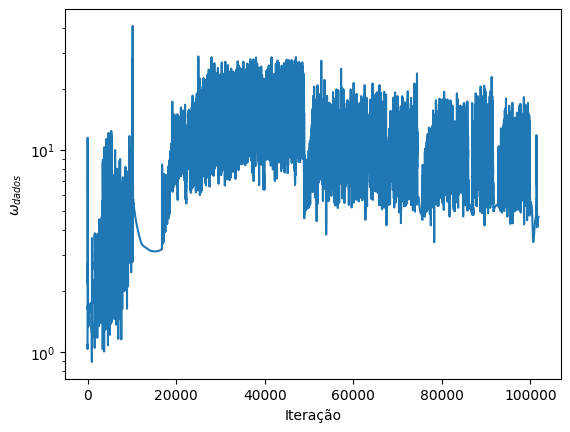

In [ ]:
if model.data_weight_hist:
    plotting.plot_wdata(model.data_weight_hist, "wdados-english-boarding-school")

In [15]:
pred_eval = model.predict(data_t)
eval_predictions(I_data, pred_eval[:,1], ["I"])

TypeError: eval_predictions() takes 2 positional arguments but 3 were given